# 02805 Social graphs and interactions, Fall 20205 - Assignment 1

In [35]:
#import all necessary libraries and modules
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle, requests, os, re

## Assignment 1.1: Exploring WS and BA models

#### $\textbf{Did you really read the text?}$

##### Question: What's the problem with random networks as a model for real-world networks according to the argument in section 3.5?

Answer: In random networks the different nodes does not have a very large difference in the number of links to other nodes. This is in contrast to real world phenomena, where (in the social network for instance) we have some outliers who know many thousands of people, and some who do not know almost any. We are missing the big Hubs which connect a lot of people. This can be seen in chapter 3.5 Image 3.6, where the actual degree distribution of a real network, does not at all reflect the idealized version of the random network.

##### Question: List the four regimes that characterize random networks as a function of $<k>$.

Answer: The four regimes that characterize random networks are: 
1) Subcritical Regime | Here the average degree of a node <k> < 1. This results in a network consisting of many tiny clusters. That is, a highly disconnected network of nodes. The largest cluster in this domain is roughly of size ln N
2) Critical point | Here we have <k> = 1. This lead s to a significant jump in the size of the largest cluster in the network. We still don't have a giant component, however the largest cluster is rougly of size N^(2/3).
3) Supercritical Regime | Here we have <k> > 1. In this regime we start to have giant component. The size of the largest component is roughly (p-1/N)N. In this regime we will have multiple connected components coexisting with the giant component.
4) Connected Regime | Here we have <k> > ln N. In this regime the giant component absorbs all other nodes, leaving (almost) no isolated nodes.

##### Question: According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

Answer: Beacause in the random network we expect the culstering coefficient to decrease as N grows. This is in contrast to real networks where this decreases as a function of k. This means that the clustering coefficient in real networks are more or less independent of the size of the network size.

#### $\textbf{WS Edition}$

##### Question: First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p=0, 0.1,$ and $1$. Calculate the average shortest path length $<d>$ for each one.

In [36]:
# Answer:
### Insert code here

##### Question: Describe what happens to the network when $p=1$.

Answer:

##### Question: Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p=0$. What's the value of $p$ for which the average shortest path length get close to the short paths we find in a fully randomized network.

In [37]:
# Answer:
### Insert code here

##### Question: Let's investigate this behavior in detail. Generate 50 networks with $N = 500, <k> = 4$, for each of $p \in \left\{ 0, 0.01, 0.03, 0.05, 0.1, 0.2\right\}$. Calculate the average of $<d>$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [38]:
# Answer:
### Insert code here

##### Question: Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

Answer:

#### $\textbf{BA Edition}$

##### Question: What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

Answer:

##### Question: What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

Answer:

##### Question: First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

In [39]:
# Answer:
### Insert code here

##### Question: Now add another node, connecting one of the existing nodes in proportion to their degree.

In [40]:
# Answer:
### Insert code here

##### Question: Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

In [41]:
# Answer:
### Insert code here

##### Question: Plot the network.

In [42]:
# Answer:
### Insert code here

##### Question: Add more nodes until you have a 5000 node network.

In [43]:
# Answer:
### Insert code here

##### Question: What's the maximum and minimum degree?

In [44]:
# Answer:
### Insert code here

##### Question: Now, bin the degree distribution using numpy.histogram.,

In [45]:
# Answer:
### Insert code here

##### Question: Plot the distribution. Plot it with both linear and log-log axes.

In [46]:
# Answer:
### Insert code here

#### $\textbf{Explain your process in words}$

##### Question: Document how you crawled the network.
Structure: First, simply describe the steps of the process (what you did, step by step)
Then, write a short section about which part of the process that was most difficult
Next write a short section about how you used LLMs to help you
Finally, compose a short section about what you would do differently if you had to do it again

Answer:

#### $\textbf{Simple network statistics and analysis}$

In [47]:
# Download the data from github if not already downloaded
filename = "assignment_1_rock_bands.pkl"

url = "https://raw.githubusercontent.com/sorenstange/02805_Social_graphs_and_interactions/main/assignment_1_rock_bands.pkl"

# Step 1: Check if file exists
if not os.path.exists(filename):
    # Download the file if it does not exist
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")
else:
    print("File already exists. Skipping download.")

# Step 2: Load the .pickle file
with open(filename, "rb") as f:
    data = pickle.load(f)

File already exists. Skipping download.


In [48]:
# Declare helper functions
def clean_links(links):
    arr = []
    for l in links:
        match = re.search(r'|', l)
        if match:
            splits = l.split(r'|')
            arr.append(splits[0].replace(' ', '_'))
        else:
            arr.append(l.replace(' ', '_'))
    return arr

def analyze_node(data_point):
    Node = data_point['page_name']
    text = data_point['content']
    words = len(text.split())
    links_to = re.findall(r'\[\[([^\]]+)\]\]', text)
    links_to = clean_links(links_to)
    return Node, links_to, words

def create_network(data):
    G = nx.DiGraph()
    Nodes = list(set([data_point['page_name'] for data_point in data]))
    for data_point in data:
        Node, links_to, words = analyze_node(data_point)
        G.add_node(Node, words=words)
        for links_to_node in links_to:
            if links_to_node in Nodes:
                G.add_edge(Node, links_to_node)
    
    # Extract the largest component
    components = nx.weakly_connected_components(G)
    largest = max(components, key=len)
    G = G.subgraph(largest).copy()
    return G

def plot_stacked_histograms(array1, array2, bins=30, suptitle = 'Histograms of the In- and Out-degrees of the rock performers network', title1 = 'In-degree distribution', title2 = 'Out-degree distribution', xlabel="Value", ylabel="Frequency"):
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.rcParams.update({
        "font.size": 12,
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
        "figure.titlesize": 16
    })

    fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)

    # First histogram
    axes[0].hist(array1, bins=bins, color="#1f77b4", alpha=0.8, edgecolor="black")
    axes[0].set_title(title1)
    axes[0].set_ylabel(ylabel)

    # Second histogram
    axes[1].hist(array2, bins=bins, color="#ff7f0e", alpha=0.8, edgecolor="black")
    axes[1].set_title(title2)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)

    # Layout adjustments
    fig.suptitle(suptitle, fontsize=16, weight="bold")
    fig.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()

G = create_network(data)

##### Question: What is the number of nodes in the network?

In [49]:
# Answer:
print(f'A: There are {len(G.nodes())} nodes in the network.\n')

A: There are 485 nodes in the network.



##### Question: What is the number of links in the network?

In [50]:
# Answer:
print(f'A: There are {len(G.edges())} links in the network.\n')

A: There are 7678 links in the network.



##### Question: Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

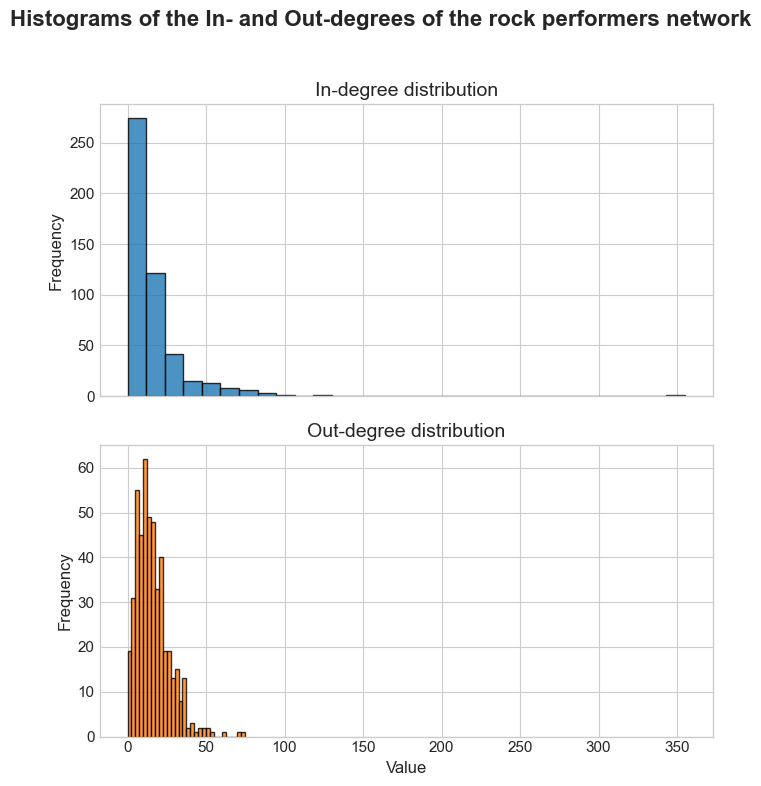

In [51]:
# Answer:
in_degree = [deg for _, deg in G.in_degree()]
out_degree = [deg for _, deg in G.out_degree()]

plot_stacked_histograms(in_degree, out_degree, bins = 30)

Figure X: Insert figure text here.

##### Question: Compare the out-degree distribution to a random network with the same number of nodes and links.

In [52]:
# Answer:
### Insert code here

##### Question: Compare the in-degree distribution to a scale-free network with the same number of nodes.

In [53]:
# Answer:
### Insert code here

##### Question: Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)?

In [61]:
# Answer:
sorted_nodes = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
top5_in = sorted_nodes[:5]

sorted_nodes = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
top5_out = sorted_nodes[:5]

print('Top 5 most connected performers (In-degree):')
print('\tPerformer:\t\t\tIn-degree:\t')
for performer, degree in top5_in:
    print(f'\t\t\t{performer}\t\t\t{degree}')
print()
print('Top 5 most connected performers (Out-degree):')
print('\tPerformer:\t\t\tOut-degree:\t')
for performer, degree in top5_out:
    print(f'\t\t\t{performer}\t\t\t{degree}')

Top 5 most connected performers (In-degree):
	Performer:			In-degree:	
			AllMusic			355
			Led_Zeppelin			119
			Bob_Dylan			95
			Queen_(band)			88
			Metallica			85

Top 5 most connected performers (Out-degree):
	Performer:			Out-degree:	
			Alice_in_Chains			75
			Deep_Purple			72
			Black_Sabbath			61
			Def_Leppard			53
			Guns_N'_Roses			52


- Comment on your findings. Is this what you would have expected?

##### Question: What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [64]:
# Answer:
nodes_with_words = [(node, data['words']) for node, data in G.nodes(data=True)]
top10 = sorted(nodes_with_words, key=lambda x: x[1], reverse=True)[:10]
print('Top 10 pages with longest wiki entries:')
print('\tPerformer:\t\t\t\tWords:\t')
for performer, words in top10:
    print(f'\t\t\t{performer}\t\t\t\t{degree}')

Top 10 pages with longest wiki entries:
	Performer:				Words:	
			Bob_Dylan				52
			Guns_N'_Roses				52
			Paul_McCartney				52
			Queen_(band)				52
			The_Rolling_Stones				52
			David_Bowie				52
			Elton_John				52
			U2				52
			The_Beach_Boys				52
			Elvis_Presley				52


#### Let's build a simple visualization of the network

1. For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).
- Note: Keep the directed graph, we will use it in the following exercises.
2. Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithms here.)
- Set up your plot so that node-size depends on the node degree.
- Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [56]:
# Answer:
### Insert code here